
# **Background**

COVID-19 is a disease that has now become a global pandemic. Governments in various countries generally swiftly form task force units to handle the spread of COVID-19 in the community, including the government in Indonesia.

One of the action taken by the government is to collect and provide data on the growth of COVID-19 cases to the public. The case growth data is often accompanied by dashboards and supporting visualization charts in the hope that the public can understand the information more easily. For example, the [covid19.go.id](https://covid19.go.id) portal created by the National COVID-19 Handling Task Force and the [PIKOBAR (Pusat Informasi & Koordinasi COVID-19 Provinsi Jawa Barat)](https://pikobar.jabarprov.go.id/data) portal belonging to the West Java Provincial government, as well as many other COVID-19 data portals provided by each local government.

This project is provided by *DQLab*. In this project, we will explore and analyze COVID-19 data in Indonesia. The data used is taken directly from the API (Application Programming Interface) available at [covid19.go.id](https://covid19.go.id). So we will learn techniques for retrieving data from APIs, techniques for preparing data, and data analysis and visualization.

# **API (Application Programming Interface)**


Indonesia's COVID-19 data recapitulation is available in the public API at https://data.covid19.go.id/public/api/update.json.

One way to access the API is to use the `get()` function from the requests library.
Now we're going to enable the requests library and run the `get()` function at the aforementioned API address. We store the result of the function in an object named `resp`.

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

When we run the `get()` function, basically what happens is we make a request to the API provider server. Our request is then processed and answered by the server as a response. The `resp` object that we have created has the response information by the server.

There are three main pieces of information in an API response, namely: 
- *status*, that has information whether our request was successful or not and is stated in the status code,
- *headers*, generally contain metadata information, and
- *body*, that contains the content of the request that has been made.

There are several types of status codes that are commonly encountered, including:

- `200` means that the request was successfully fulfilled.
- `404` means that the requested file could not be found.
- `500` means that the request access is denied.
- `501` means that an error has occurred on the server.

You can learn complete information about the types of status codes at https://restfulapi.net/http-status-codes/.

Now, we can print the `resp` directly which has output status on our request via API.

In [2]:
print(resp)

<Response [200]>


Now let's try to run the attribute `headers` on the `resp` to find out what metadata is stored using the `print()` function.

In [3]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Thu, 12 Aug 2021 04:43:03 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Thu, 12 Aug 2021 04:42:01 GMT', 'ETag': 'W/"6114a699-31d98"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


*Note: the code in this project was executed on Thursday, 12 August 2021, around 1 p.m. GMT+7*

The API response with status code `200` states that our request was successfully fulfilled and the requested content is available for extraction. In addition, we also know through the `headers` attribute that the requested content is available in the form of `application/json`, i.e. a `JSON` file.

Then we can extract the content using the `json()` method. The `json()` method is a built-in JSON decoder to extract content of type `JSON`. We can also use the `content` attribute but this is binary content which we need to reprocess later. We run the `json()` method on the `resp` object and save the result as `cov_id_raw`.

This `cov_id_raw` data type is `dict`.

In [4]:
cov_id_raw = resp.json()

By using the `len()` function and the `keys()` method, we will observe how many components there are and what are the names of the components in the `cov_id_raw` object. Then we extract the 2nd key and save it with the name `cov_id_update`.

In [5]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


We will now try to focus on the `cov_id_update` object to answer the following questions:

- When is the update date for additional case data?
- How many additional recovered cases?
- What is the number of additional deaths?
- What is the total number of positive cases to date?
- What is the total number of deaths to date?

In [6]:
print('Tanggal pembaharuan data penambahan kasus    :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh               :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal            :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini   :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus    : 2021-08-11
Jumlah penambahan kasus sembuh               : 39931
Jumlah penambahan kasus meninggal            : 1579
Jumlah total kasus positif hingga saat ini   : 3749446
Jumlah total kasus meninggal hingga saat ini : 112198


# **West Java Data**

We have succeeded in answering questions regarding the condition of COVID-19 in Indonesia by using data directly retrieved using the API. However, what if we want to focus on COVID-19 data in one of the provinces?

The [covid19.go.id](https://covid19.go.id) portal provides provincial-level COVID-19 case data at different API addresses. For data regarding COVID-19 West Java, available at https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json.

In [7]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

Now we try to run the `keys()` method on the `cov_jabar_raw` to find out the names of the main elements available.

In [26]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


Then we can answer the following questions:
- What is the total number of COVID-19 cases in West Java?
- What is the percentage of deaths from COVID-19 in West Java?
- What is the percentage of cure rate from COVID-19 in West Java?

In [28]:
print('Jumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 646596
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.718693.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 86.921354.2%


We have received general information about COVID-19 in West Java. However, the information will be more complete if we have data on the development of COVID-19 from time to time. This information is also provided by covid19.go.id through the API request we made earlier. The historical data on the development of COVID-19 is stored under the name `list_perkembangan`.

We extract the data from `cov_jabar_raw` and to make it easier to inspect the data, we change the data of type `dict` to pandas dataframe. Then we store the result as an object named `cov_jabar`. We also observe the structure of `cov_jabar` using the `info()` and `head()` methods.

In [9]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       528 non-null    int64
 1   KASUS                         528 non-null    int64
 2   MENINGGAL                     528 non-null    int64
 3   SEMBUH                        528 non-null    int64
 4   DIRAWAT_OR_ISOLASI            528 non-null    int64
 5   AKUMULASI_KASUS               528 non-null    int64
 6   AKUMULASI_SEMBUH              528 non-null    int64
 7   AKUMULASI_MENINGGAL           528 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  528 non-null    int64
dtypes: int64(9)
memory usage: 37.2 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583107200000      3  ...                    0                             3
1  1583193600000 

After extracting and observing `cov_jabar`, we found data irregularities in the date column and inconsistent column writing format. Now we will try to perform several steps to "tame" the data so that it can be processed and analyzed more easily.

We will take several steps to "tame" the `cov_jabar` data, namely:

- Removed column `DIRAWAT_OR_ISOLASI` and all columns containing cumulative values.
- Changed the writing format of all columns to lowercase.
- Rename column `kasus` to `kasus_baru`.
- Fixed data type in `tanggal` column using `pd.to_datetime`.

We will use chaining technique on the dataframe and save the processing result with the name `cov_jabar_tidy`.

In [11]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())
print('\nLima data terakhir:\n', cov_jabar_tidy.tail())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0

Lima data terakhir:
        tanggal  kasus_baru  meninggal  sembuh
523 2021-08-07        3001         79    4925
524 2021-08-08        2244         58   18813
525 2021-08-09        2416        120    8808
526 2021-08-10        4152        491    7445
527 2021-08-11        3165        120    8118


# **Data Visualization**

Now that we have tame data, we now express that data in another form that hopefully is easier to digest: graphs. We will start designing visualizations that have aesthetics using the `matplotlib` library.

In [12]:
import matplotlib.pyplot as plt

The main components for making visualizations include data tables, data columns, and geometric shapes to present data. For example, to create a scatter-plot we need a point geometry (`.scatter()`), a line-chart requires a line geometry (`.plot()`), while a bar-chart requires a bar or column geometry (`.bar()`).

We will create a bar-chart of the daily number of new COVID-19 cases in West Java using `cov_jabar_tidy` data with the `date` column as the x-axis.

<Figure size 432x288 with 0 Axes>

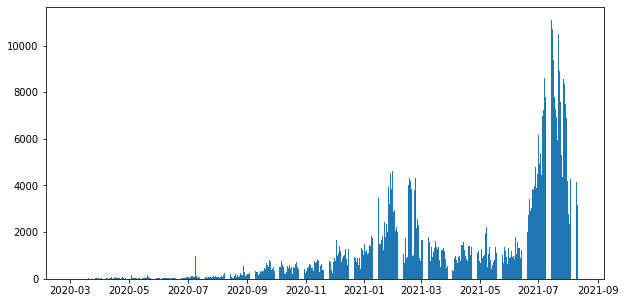

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

#### **Graphic Information**

<Figure size 432x288 with 0 Axes>

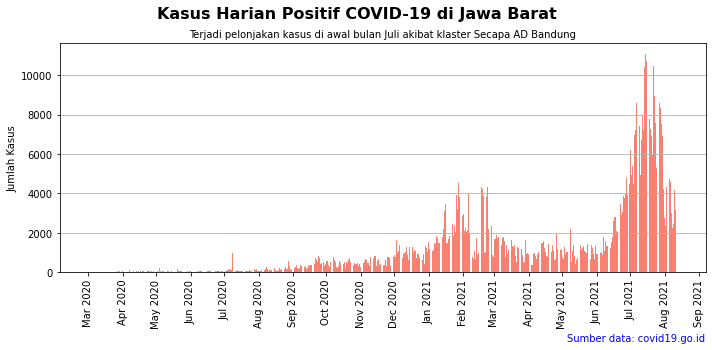

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('\nTerjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### *1.   Graphics for Cured Cases*




<Figure size 432x288 with 0 Axes>

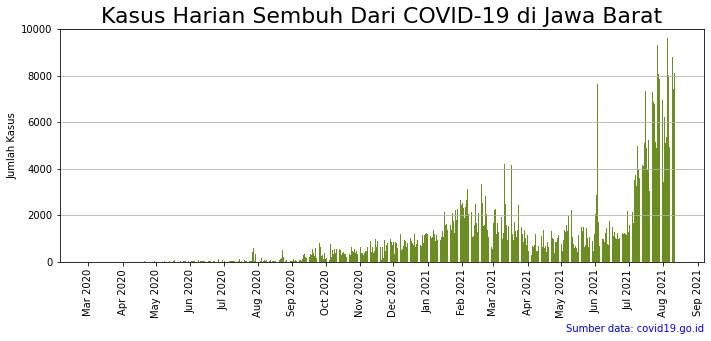

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.ylim(ymax=10000)
plt.tight_layout()
plt.show()

##### *2.   Graphics for Dead Cases*


<Figure size 432x288 with 0 Axes>

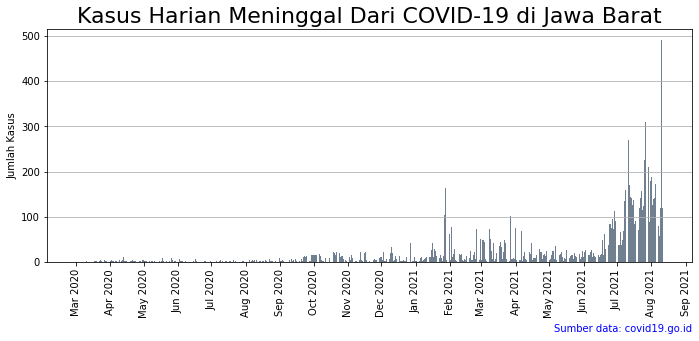

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Analysis: "Was This Week Any Better?"**

After observing the graph of the development of cases, we realize that there is a daily fluctuation in the number of cases. Based on this, we will then try to observe how the case progresses in a span of weeks.

We can easily do this through predefined code, that is, we first set the `tanggal` column in `cov_jabar_tidy` as index. Then we apply the method on the time series in pandas, resampling per week and using the sum aggregation. As for what will be used to extract information for the week in one year `weekofyear` and `year` for the year.

We count weekly case increments and store the result as `cov_jabar_pekanan`. We use the `info()` and `head()` methods to perform data inspection.

In [33]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())
print('\nLima data terbawah cov_jabar_pekanan:\n', cov_jabar_pekanan.tail())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     76 non-null     int64
 1   pekan_ke  76 non-null     int64
 2   jumlah    76 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       7
1   2020        11       5
2   2020        12      52
3   2020        13     104
4   2020        14     131

Lima data terbawah cov_jabar_pekanan:
     tahun  pekan_ke  jumlah
71   2021        28   64568
72   2021        29   52461
73   2021        30   42669
74   2021        31   25164
75   2021        32    9733


In order to answer the question "Is this week better than last week?", we do a simple calculation with the following steps:

- Create a new column named `jumlah_pekanlalu` containing the number of new cases in the previous week.
- Replaced the value of `NaN` in the column `jumlah_pekanlalu` with a value of 0.
- Comparing the column `jumlah` with the column `jumlah_pekanlalu`. The results of this comparison are stored in a new column with the name `lebih_baik`. Its contents are `True` if the number of new cases this week is lower than the number of cases last week, and `False` otherwise.

We will use the `shift()` method to create the column `jumlah_pekanlalu`, and inspect our work using `head(10)` and `tail(10)` to see the characteristics of the addition of the first and last 10 data.

In [35]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))
print('\nSepuluh data terbawah:\n', cov_jabar_pekanan.tail(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       7                 0       False
1   2020        11       5                 7        True
2   2020        12      52                 5       False
3   2020        13     104                52       False
4   2020        14     131               104       False
5   2020        15     235               131       False
6   2020        16     277               235       False
7   2020        17     216               277        True
8   2020        18     156               216        True
9   2020        19     367               156       False

Sepuluh data terbawah:
     tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
66   2021        23    9180              7129       False
67   2021        24   15626              9180       False
68   2021        25   23733             15626       False
69   2021        26   34099             23733       False
70   2021        27   49602        

#### **Create the Bar Chart**

By using the calculated data, we can now create a weekly bar-chat with new information added to answer the question: "Was this week any better?"

<Figure size 432x288 with 0 Axes>

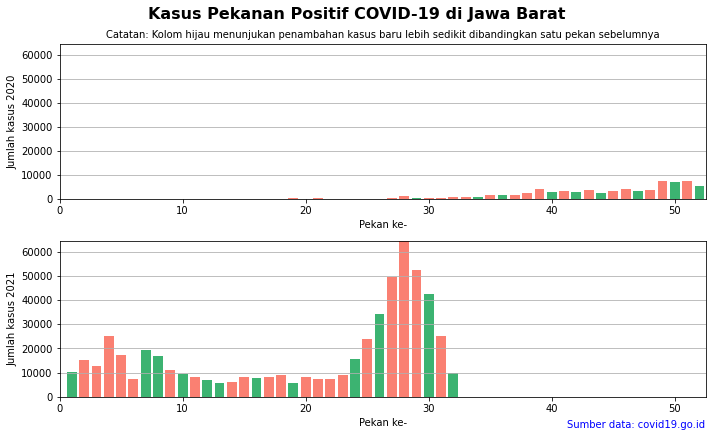

In [38]:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
						 figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
			 y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
		   x='pekan_ke', height='jumlah',
		   color=['mediumseagreen' if x is True else 'salmon'
				  for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('\nCatatan: Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
				fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid19.go.id', color='blue',
			ha='right', transform=ax.transAxes)
				 
	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
	ax.set_xlabel('Pekan ke-')
	ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
	ax.grid(axis='y')

plt.tight_layout()
plt.show()

#### **Patterns and Dynamics**

From the information obtained, some have finally recovered, but not a few have died from COVID-19. Meanwhile, the addition of new cases continues to occur in the community. This may trigger another question: "How many active cases are there so far?" (Active in the sense of being in treatment or isolation)

This information has actually been provided in the [covid19.go.id](https://covid19.go.id) API response that we requested. But we can try to calculate it ourselves.

The number of active cases can be calculated by subtracting the number of accumulated positives by the number of accumulated recoveries and the number of accumulated deaths. We can use the `cumsum()` method to calculate the accumulated value of a numeric vector.

In [41]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print('Sepuluh data terbaru : \n', cov_jabar_akumulasi.tail(10))

Sepuluh data terbaru : 
        tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
518 2021-08-02           118973            485387                 9679
519 2021-08-03           118045            490475                 9818
520 2021-08-04           116513            495857                 9960
521 2021-08-05           111417            505494                10133
522 2021-08-06           107857            513521                10240
523 2021-08-07           105854            518446                10319
524 2021-08-08            89227            537259                10377
525 2021-08-09            82715            546067                10497
526 2021-08-10            78931            553512                10988
527 2021-08-11            73858            561630                11108


#### **Create the Line Chart**

Now we try to create a line-chart of the active case pattern using the `plot` method on `ax`.

<Figure size 432x288 with 0 Axes>

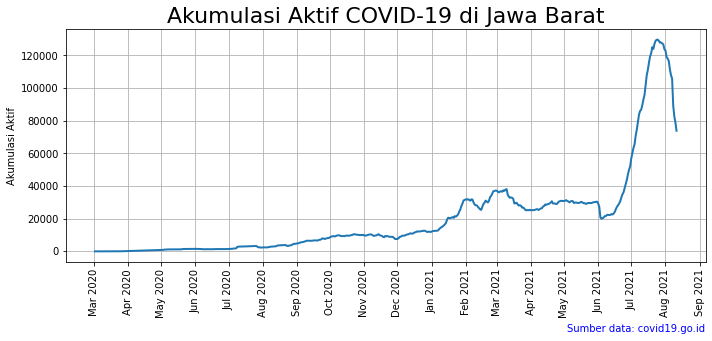

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi Aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

# **Final Stage**

To conclude the analysis in this project, we make a comparison graph between the accumulation of active cases, cured cases, and dead cases.

There are two choices of ways that can be taken to create the graph:

- using the data frame `cov_jabar_akumulasi`, with column type datetime set to index, so we have a time series dataframe. Then we can directly line plot and choose the appropriate line color to distinguish; or
- uses `ax.plot()` and fills the columns which are x and y respectively with data=`cov_jabar_akumulasi`, and then sets different colors for the three line plots.

<Figure size 432x288 with 0 Axes>

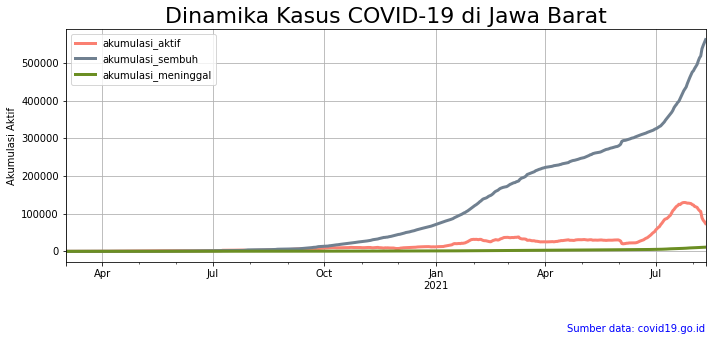

In [43]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
						 color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()

Finally, through this project, we have imported data through the API, transformed data, and created data visualizations to provide information on the results of data analysis about COVID-19 in Indonesia and West Java.